In [14]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import pickle
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import *
# import umap
import os
from sknetwork.clustering import Louvain,get_modularity
import sys 
sys.path.append(os.getcwd()+'/../scripts/')
from UMAP_utils import *

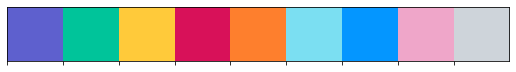

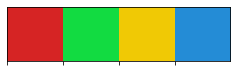

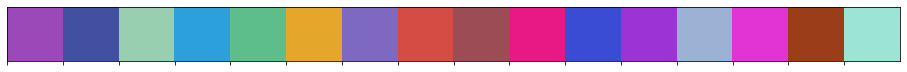

In [109]:
pal = ["#00202e","#003f5c","#2c4875","#8a508f","#bc5090","#ff6361","#ff8531","#ffa600","#ffd380"]
CUSTOM_PAL_SORT_3 = ['#5e60ce','#00c49a','#ffca3a','#D81159','#fe7f2d','#7bdff2','#0496ff','#efa6c9','#ced4da']
GMM_PAL = ['#d62424','#12db41','#f0c905','#248cd6']

# In RGB form
coherence_colors = [[0.609, 0.283, 0.724],
                    [0.259,	0.314, 0.635],
                    [0.6,	0.812, 0.698],
                    [0.176,	0.631, 0.859],
                    [0.369,	0.749, 0.549],
                    [0.898,	0.654, 0.169],
                    [0.5,	0.41 , 0.75],
                    [0.834,	0.3 , 0.265],
                    [0.612,	0.3 , 0.334],
                    [0.912,	0.1 , 0.52],
                    [0.23,	0.3 , 0.834],
                    [0.612,	0.2 , 0.834],
                    [0.612,	0.7 , 0.834],
                    [0.89,	0.2 , 0.834],
                    [0.612,	0.24 , 0.1],
                    [0.612,	0.9 , 0.834]]
sns.palplot(CUSTOM_PAL_SORT_3)
sns.palplot(GMM_PAL)
sns.palplot(coherence_colors)

In [17]:
SH_files =pd.read_pickle("D:/Data For Publication/CC_files_NC.pkl")
FN_files =pd.read_pickle("D:/Data For Publication/FN_files_NC.pkl")


In [18]:
SH_files.exp_name = [i[:-3] for i in SH_files.exp_name]



In [19]:
common_exps_FN_SH = set(list(SH_files.exp_name)) & set(list(FN_files.exp_name))


SH_files_NC = SH_files[SH_files.exp_name.isin(common_exps_FN_SH)]
FN_files_NC = FN_files[FN_files.exp_name.isin(common_exps_FN_SH)]


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


5


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


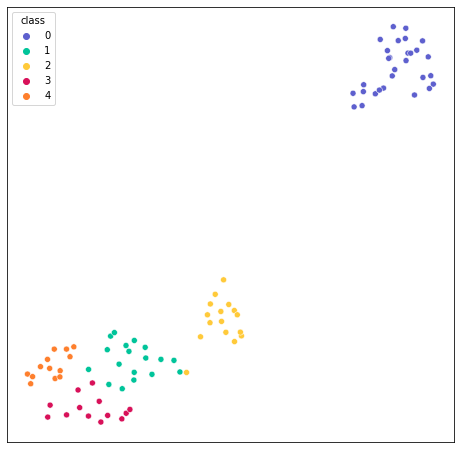

In [21]:
waves_SH = normalize(np.vstack(SH_files_NC['waveforms']))
lables_wave_SH_NC,mapper_cc,reducer_cc = plot_UMAP_clusters_single(waves_SH,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                          norm=False
                          )

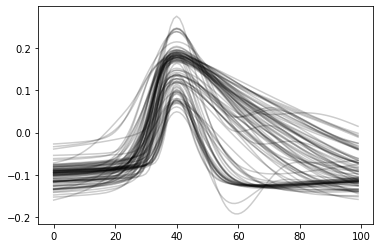

In [23]:
plt.plot(waves_SH.T,c='black',alpha=0.2)
plt.show()

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


4


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


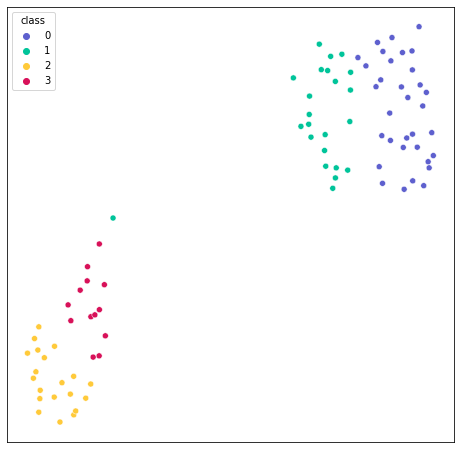

In [24]:
waves_FN = normalize(np.vstack(FN_files_NC['waveform']))
lables_wave_FN_NC,mapper_FN,reducer_FN = plot_UMAP_clusters_single(waves_FN,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                          norm=False
                          )

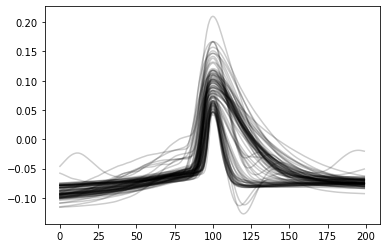

In [183]:
plt.plot(waves_FN.T,c='black',alpha=0.2)
plt.show()

In [25]:
SH_data = pd.read_pickle("D:/CC_analyzed_feat_set/CC_files_all_experimenters_all_conditions.p")
SH_exps = list(set(SH_data['exp_name']))
SH_exps_acsf = SH_data[SH_data.drug==False].exp_name 


FN_data = pd.read_pickle("D:/FN_analysed_feat_set/Ephys_collection_all_exps_all_conds_spikes_calculated.pkl")
# FN_data.exp_name = FN_data.exp_name.apply(return_name_date_exp_fn)
FN_exps = set(FN_data.exp_name) 

FN_data.cond = [i.lower() for i in FN_data.cond]
FN_data_acsf = FN_data[FN_data.cond.isin(['acsf','acsf_bic'])] 
FN_exps_acsf = set(FN_data[FN_data.cond=='acsf'].exp_name) 


common_exps = (list(set(SH_exps_acsf) & set(FN_exps_acsf)))
len(common_exps)

101

In [30]:
common_FN = FN_data[FN_data.exp_name.isin(common_exps)]
common_SH = SH_data[SH_data.exp_name.isin(common_exps)]
SH_acsf = common_SH[common_SH.drug==False].drop_duplicates('exp_name')
FN_acsf = common_FN[common_FN.cond=='acsf'].drop_duplicates('exp_name')


cc_cols_to_scale = ['mean_thr', 'max_thr', 'min_thr', 'median_thr','mean_amplitude',
'median_amplitude', 'max_amplitude', 'min_amplitude'] 
SH_acsf[cc_cols_to_scale] = SH_acsf[cc_cols_to_scale]*1000
FN_acsf = FN_acsf.sort_values('exp_name')
SH_acsf = SH_acsf.sort_values('exp_name')


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


5


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


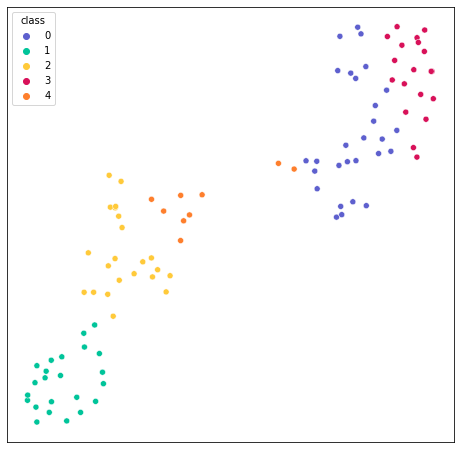

In [31]:
waves_SH = normalize(np.vstack(SH_acsf['waveforms']))
lables_wave_SH,mapper_SH,reducer_SH = plot_UMAP_clusters_single(waves_SH,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                          norm=False
                          )

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


4


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


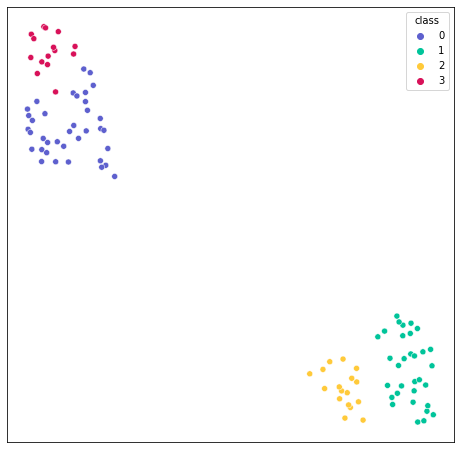

In [32]:
waves_FN = normalize(np.vstack(FN_acsf['waveform']))
lables_wave_FN,mapper_FN,reducer_FN = plot_UMAP_clusters_single(waves_FN,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                          norm=False
                          )

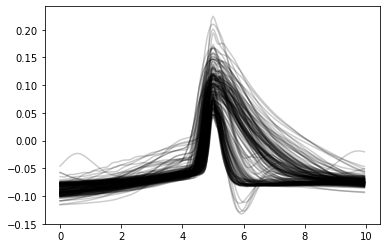

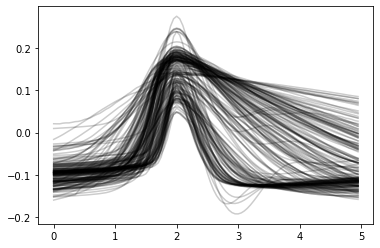

In [212]:
plt.plot(np.arange(0,200/20,1/20),waves_FN.T,c='black',alpha=0.2)
plt.show()


plt.plot(np.arange(0,100/20,1/20),waves_SH.T,c='black',alpha=0.2)
plt.show()


In [35]:
common_cols =[ 'current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'median_isi', 'max_isi', 'min_isi',
       'first_thr', 'mean_thr', 'median_thr', 'min_thr', 'max_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude', 'min_amplitude', 'max_amplitude',]

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


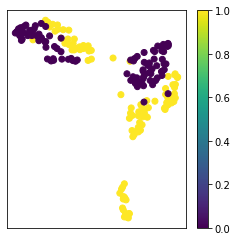

In [36]:
scaler = StandardScaler()


fn_numpy = normalize(FN_acsf[common_cols].to_numpy(),axis=0,norm='l2')
sh_numpy = normalize(SH_acsf[common_cols].to_numpy(),axis=0,norm='l2')

all = np.vstack([fn_numpy,sh_numpy]) 

plot_UMAP_values(all,np.hstack([np.ones(len(fn_numpy)),np.zeros(len(sh_numpy))]),random_state=42)


## Combine data from NC dataset and common dataset

In [271]:
FN_combined = pd.read_pickle('D:/Data For Publication/combined_FN_acsf.pkl')
SH_combined = pd.read_pickle('D:/Data For Publication/combined_CC_acsf.pkl')

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


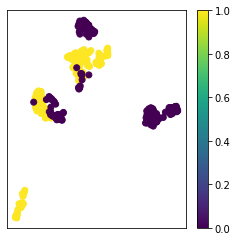

In [274]:
scaler = StandardScaler()


fn_numpy = normalize(FN_combined[common_cols].to_numpy(),axis=0,norm='l2')
sh_numpy = normalize(SH_combined[common_cols].to_numpy(),axis=0,norm='l2')

all = np.vstack([fn_numpy,sh_numpy]) 

plot_UMAP_values(all,np.hstack([np.ones(len(fn_numpy)),np.zeros(len(sh_numpy))]),random_state=42)


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


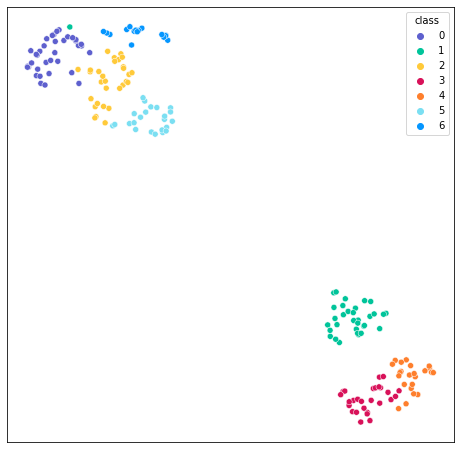

In [283]:
waves_FN = normalize(np.vstack(FN_combined['waveform']))
labels_wave_FN,mapper_FN,reducer_FN = plot_UMAP_clusters_single(waves_FN,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                          norm=False,
                          save=True,
                          savepath = 'D:/Data For Publication/figures/FN_SH/FN_waves.pdf'
                          )

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


8


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


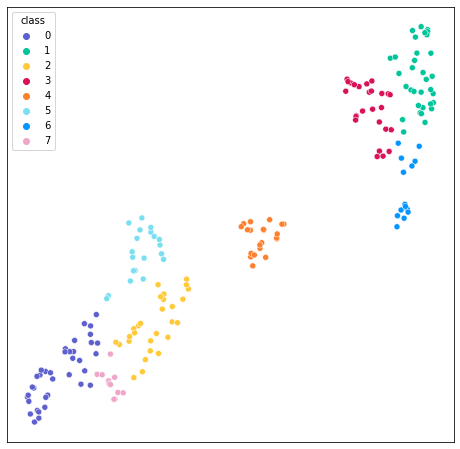

In [284]:
waves_SH = normalize(np.vstack(SH_combined['waveforms']))
labels_wave_SH,mapper_SH,reducer_SH = plot_UMAP_clusters_single(waves_SH,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                          norm=False,
                          save=True,
                          savepath = 'D:/Data For Publication/figures/FN_SH/SH_waves.pdf'
                          )

0 37
1 33
2 28
3 26
4 21
5 20
6 14
7 11


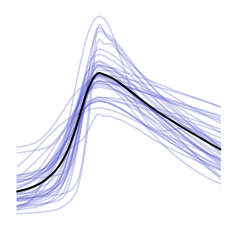

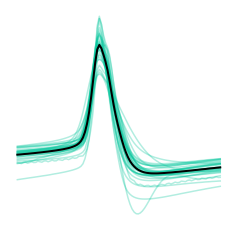

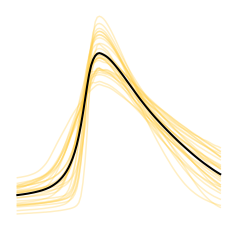

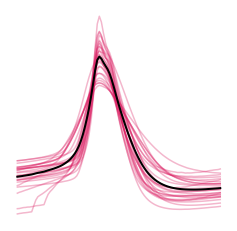

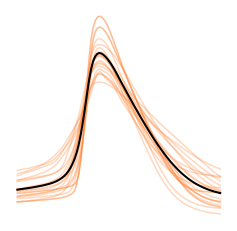

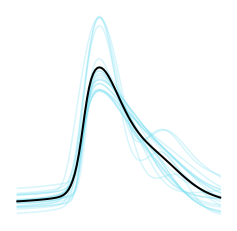

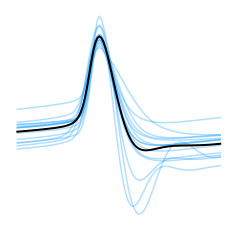

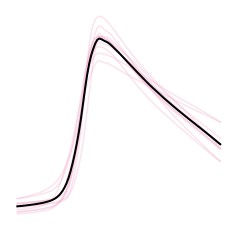

In [285]:
SH_combined['waveform_labels_SH'] = labels_wave_SH
savefolder = 'D:/Data For Publication/figures/FN_SH/'

for i in set(SH_combined['waveform_labels_SH']):

    fig,ax = plt.subplots(figsize=[4,4])
    fig.patch.set_visible(False)
    ax.axis('off')
    print(i,len(np.vstack(SH_combined[SH_combined['waveform_labels_SH']==i]['waveforms'])))
    ax.plot(np.vstack(SH_combined[SH_combined['waveform_labels_SH']==i]['waveforms']).T,c=CUSTOM_PAL_SORT_3[i],alpha=0.3)
    ax.plot(np.mean(np.vstack(SH_combined[SH_combined['waveform_labels_SH']==i]['waveforms']).T,axis=1),c='black',alpha=1,linewidth=2)
    ax.set_xticks([])
    ax.set_yticks([])
    if os.path.exists(savefolder+'/SH_waves/'):
        plt.savefig(savefolder+'/SH_waves/wave_id'+str(i)+'.pdf')
    else:
        os.mkdir(savefolder+'/SH_waves/')
        plt.savefig(savefolder+'/SH_waves/wave_id'+str(i)+'.pdf',dpi=300)

    # plt.show()

0 36
1 33
2 30
3 28
4 24
5 23
6 16


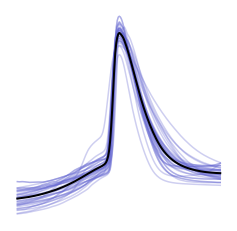

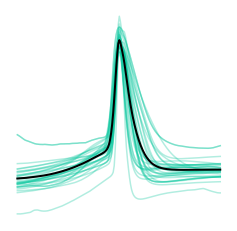

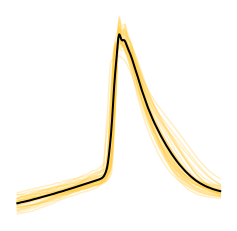

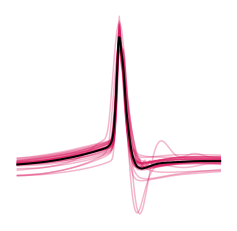

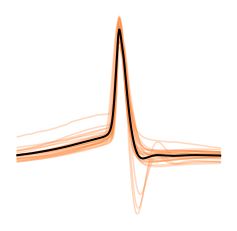

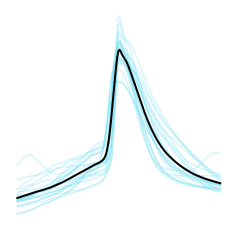

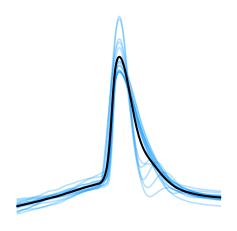

In [286]:
FN_combined['waveform_labels_FN'] = labels_wave_FN
for i in set(FN_combined['waveform_labels_FN']):
    fig,ax = plt.subplots(figsize=[4,4])
    fig.patch.set_visible(False)
    ax.axis('off')    
    print(i,len(np.vstack(FN_combined[FN_combined['waveform_labels_FN']==i]['waveform'])))
    ax.plot(np.vstack(FN_combined[FN_combined['waveform_labels_FN']==i]['waveform']).T,c=CUSTOM_PAL_SORT_3[i],alpha=0.3)
    ax.plot(np.mean(np.vstack(FN_combined[FN_combined['waveform_labels_FN']==i]['waveform']).T,axis=1),c='black',alpha=1,linewidth=2)
    ax.set_xticks([])
    ax.set_yticks([])
    if os.path.exists(savefolder+'/FN_waves/'):
        plt.savefig(savefolder+'/FN_waves/wave_id'+str(i)+'.pdf')
    else:
        os.mkdir(savefolder+'/FN_waves/')
        plt.savefig(savefolder+'/FN_waves/wave_id'+str(i)+'.pdf',dpi=300)

    # plt.show()

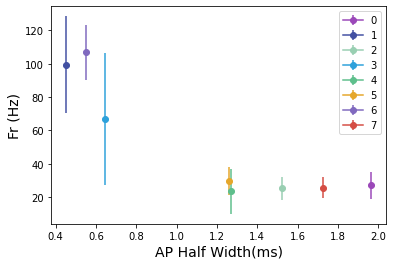

In [167]:
frs = []
ap_width = []  
frs_std = []
ap_width_std = []

for i in set(SH_combined['waveform_labels_SH']):
    frs.append(np.mean(SH_combined[SH_combined.waveform_labels_SH==i]['fr']))
    frs_std.append(np.std(SH_combined[SH_combined.waveform_labels_SH==i]['fr']))

    ap_width.append(np.mean(SH_combined[SH_combined.waveform_labels_SH==i]['mean_width']))
    ap_width_std.append(np.std(SH_combined[SH_combined.waveform_labels_SH==i]['mean_width']))

# plt.errorbar(list(set(SH_combined['waveform_labels_SH'])),frs,yerr=frs_std,marker='o',c='black')
# # plt.hlines(4,0,8,linestyles='dashed',color='grey')
# plt.ylabel('Fr (Hz)')
# plt.xlabel('class')
# plt.show()

for i in range(len(ap_width)):
    plt.errorbar(ap_width[i],frs[i],marker='o',c=coherence_colors[i],yerr=frs_std[i],label = list(set(SH_combined['waveform_labels_SH']))[i])
    plt.ylabel('Fr (Hz)',fontsize=14)
    plt.xlabel('AP Half Width(ms)',fontsize=14)
    plt.legend()
plt.savefig(savefolder+'SH_FR_V_AP_width.pdf',dpi=300)
# plt.show()

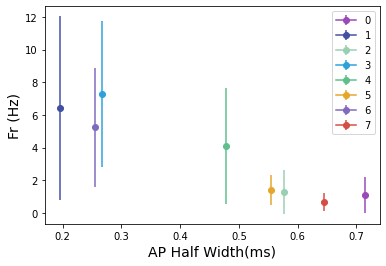

In [168]:
frs = []
ap_width = []  
frs_std = []
ap_width_std = []

for i in set(FN_combined['waveform_labels_FN']):
    frs.append(np.mean(FN_combined[FN_combined.waveform_labels_FN==i]['fr']))
    frs_std.append(np.std(FN_combined[FN_combined.waveform_labels_FN==i]['fr']))

    ap_width.append(np.mean(FN_combined[FN_combined.waveform_labels_FN==i]['mean_width']))
    ap_width_std.append(np.std(FN_combined[FN_combined.waveform_labels_FN==i]['mean_width']))

# plt.errorbar(list(set(FN_combined['waveform_labels_FN'])),frs,yerr=frs_std,marker='o',c='black')
# # plt.hlines(4,0,8,linestyles='dashed',color='grey')
# plt.ylabel('Fr (Hz)')
# plt.xlabel('class')
# plt.show()


for i in range(len(ap_width)):
    plt.errorbar(ap_width[i],frs[i],marker='o',c=coherence_colors[i],yerr=frs_std[i],label = list(set(FN_combined['waveform_labels_FN']))[i])
    plt.ylabel('Fr (Hz)',fontsize=14)
    plt.xlabel('AP Half Width(ms)',fontsize=14)
    plt.legend()
plt.savefig(savefolder+'FN_FR_V_AP_width.pdf',dpi=300)

In [ ]:
sys.path.append('C:/Users/Nishant Joshi/Model_fitting/GIFFittingToolbox/src/examples/')
from Cluster_stability import *

In [277]:

def return_confusion_matrix(df1,df2,label1_name,label2_name,shuffle = False,save=False,savepath=None):
    np.random.seed(42)
    if shuffle:
        fig,[ax1,ax2] = plt.subplots(1,2,figsize = [12,5])
        df = pd.DataFrame(columns=['label1','label2'])
        # df['exp_name1'] = df1.exp_name
        # df['exp_name2'] = df2.exp_name
        
        label1 = list(df1[label1_name])
        np.random.shuffle(label1)
        label2 = list(df2[label2_name])
        np.random.shuffle(label2)

        df['label1_sh'] = label1
        df['label2_sh'] = label2

        df['label1'] = np.array(df1[label1_name]) 
        df['label2'] = np.array(df2[label2_name])

        mat_orig = np.zeros((len(set(df1[label1_name])),len(set(df2[label2_name]))))

        for i in np.unique(df.label1):
            data_ = np.unique(df[df.label1==i]['label2'],return_counts=True)
            mat_orig[i,data_[0]] =(data_[1]/np.sum(data_[1]))*100 

        mat_sh = np.zeros((len(set(df['label1_sh'])),len(set(df['label2_sh']))))

        for i in np.unique(df.label1_sh):
            data_ = np.unique(df[df.label1_sh==i]['label2_sh'],return_counts=True)
            mat_sh[i,data_[0]] =(data_[1]/np.sum(data_[1]))*100 


        sns.heatmap(mat_orig,cmap='BrBG_r',annot=True,ax=ax1,vmin=0,vmax=100) 
        sns.heatmap(mat_sh,cmap='BrBG_r',annot=True,ax=ax2,vmin=0,vmax=100) 

        plt.show()
    else:
        df = pd.DataFrame(columns=['label1','label2'])
        # df['exp_name1'] = df1.exp_name
        # df['exp_name2'] = df2.exp_name
        df['label1'] = np.array(df1[label1_name])
        df['label2'] = np.array(df2[label2_name])

        mat = np.zeros((len(set(df1[label1_name])),len(set(df2[label2_name]))))

        for i in np.unique(df.label1):
            data_ = np.unique(df[df.label1==i]['label2'],return_counts=True)
            mat[i,data_[0]] =(data_[1]/np.sum(data_[1]))*100 

        sns.heatmap(mat,cmap='BrBG_r',annot=True,vmin=0,vmax=100) 
    
    if save:
        plt.savefig(savepath,dpi=300)
    else:
        plt.show()


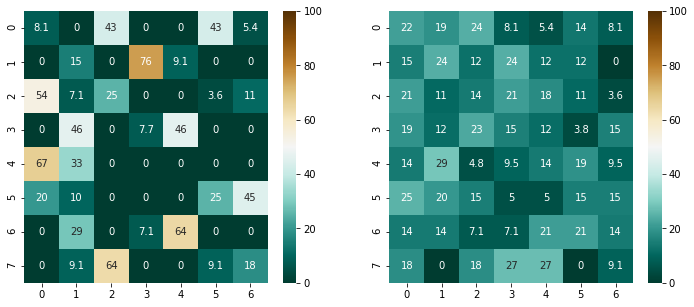

<Figure size 432x288 with 0 Axes>

In [287]:

return_confusion_matrix(SH_combined,FN_combined,'waveform_labels_SH','waveform_labels_FN',shuffle=True,save=True,savepath ='D:/Data For Publication/figures/FN_SH/confustion_matrix_waveform_SH.pdf')

In [ ]:
from xg_boost_classifier import  * 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 77.88690476190476


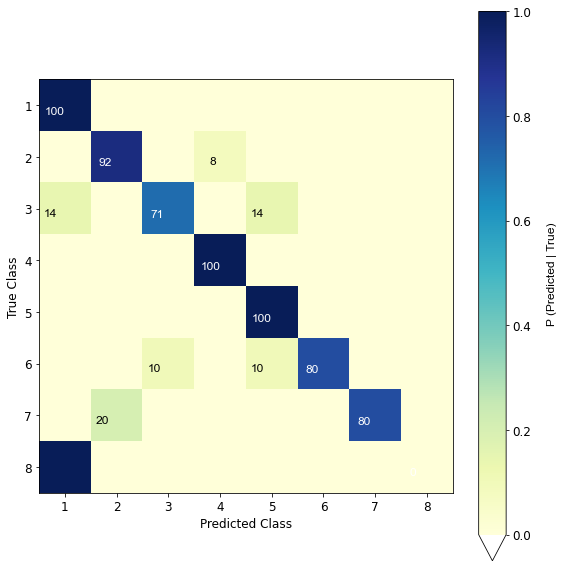

In [288]:
_ =return_xg_boost_trees_classification(SH_combined['waveforms'],SH_combined.waveform_labels_SH)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 86.39455782312926


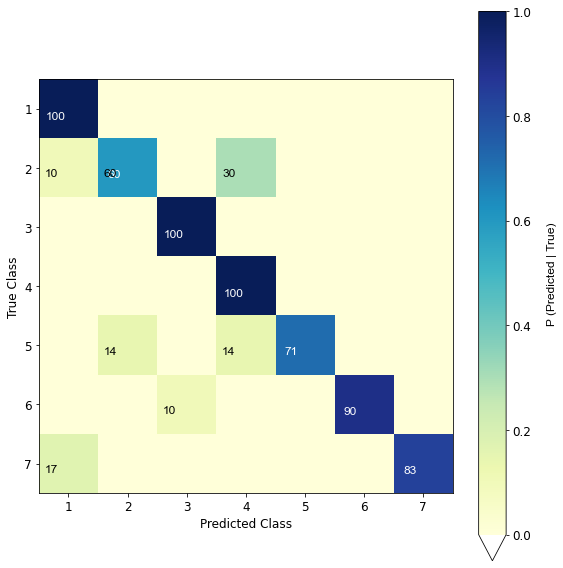

In [289]:
_ = return_xg_boost_trees_classification(FN_combined['waveform'],FN_combined.waveform_labels_FN)

In [139]:
INH_SH = SH_combined[SH_combined.waveform_labels_SH.isin([3,1,6])]
EXC_SH = SH_combined[~SH_combined.waveform_labels_SH.isin([3,1,6])]

INH_FN = FN_combined[FN_combined.waveform_labels_FN.isin([3,1,6])]
EXC_FN = FN_combined[~FN_combined.waveform_labels_FN.isin([3,1,6])]


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


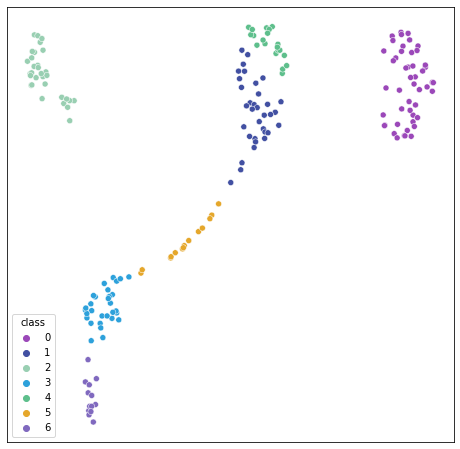

In [290]:
cols = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'max_isi', 'min_isi', 'median_isi',
       'first_thr', 'mean_thr', 'max_thr', 'min_thr', 'median_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude','max_amplitude', 'min_amplitude',]
ephys_data = normalize(np.vstack(SH_combined[cols].to_numpy()),axis=0)
lables_ephys_exc,mapper,reducer = plot_UMAP_clusters_single(ephys_data,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =coherence_colors,)
SH_combined['labels_ephys'] = lables_ephys_exc

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


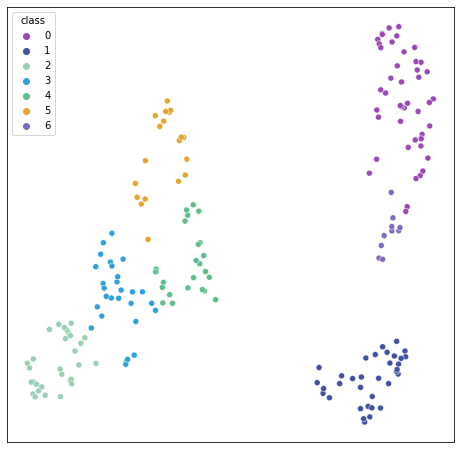

In [291]:
cols = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'max_isi', 'min_isi', 'median_isi',
       'first_thr', 'mean_thr', 'max_thr', 'min_thr', 'median_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude','max_amplitude', 'min_amplitude',]
ephys_data = normalize(np.vstack(FN_combined[cols].to_numpy()),axis=0)
lables_ephys_exc,mapper,reducer = plot_UMAP_clusters_single(ephys_data,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =coherence_colors,)
FN_combined['labels_ephys'] = lables_ephys_exc

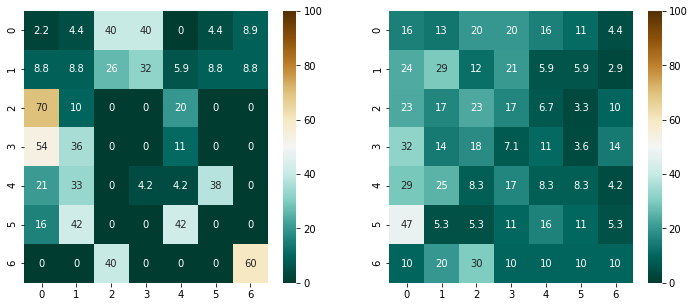

In [292]:
return_confusion_matrix(FN_combined,SH_combined,'labels_ephys','labels_ephys',shuffle=True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 93.56442577030813


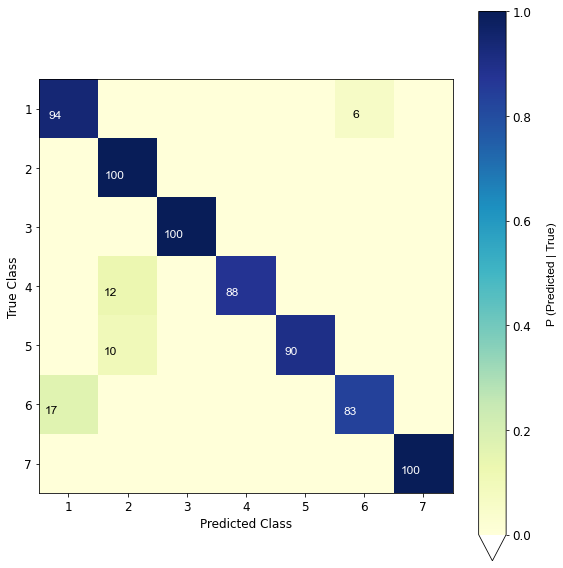

In [293]:
_ = return_xg_boost_trees_classification(FN_combined[cols].to_numpy(),FN_combined.labels_ephys)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 76.86456400742115


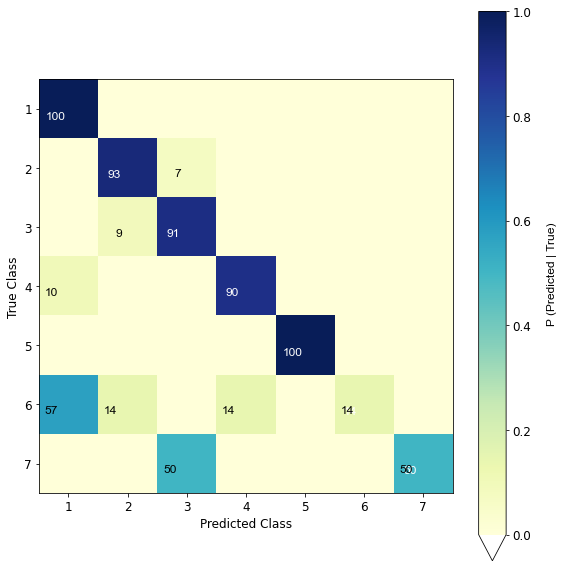

In [294]:
_ = return_xg_boost_trees_classification(SH_combined[cols].to_numpy(),SH_combined.labels_ephys)

In [267]:
import paxplot
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import normalize

def pax_plot_data(data,cols,labels,pallete, save= False):
    # # Import data

    scaler = MinMaxScaler()
    scaler_std = StandardScaler()
    # scaler_norm = normalize()
    data_to_plot = data
    cols = cols
    labels =  labels
    # Create figure
    paxfig = paxplot.pax_parallel(n_axes=len(cols))
    paxfig.set_figheight(10)
    paxfig.set_figwidth(30)

    scaled = scaler.fit_transform(data_to_plot.to_numpy())

    scaled_std = scaler.fit_transform(data_to_plot.to_numpy())

    scaled_norm = normalize(data_to_plot.to_numpy(),axis=0)

    for i in list(set(labels)):
        idx = np.where(labels==i)
        paxfig.plot(
            scaled_norm[idx[0],:], #stats.zscore(df_acsf_1.to_numpy())
            line_kwargs={'alpha': 0.5, 'color': pallete[i], 'zorder': 1}
        )

    for  ax in paxfig.axes:   
        ax.set_yticks([0,0.5,1])
        ax.tick_params(axis='x', labelsize=20,rotation=90)
        ax.tick_params(axis='y', labelsize=10)
    # # Add labels
    paxfig.set_labels(cols)
    if save: 
        plt.savefig('C:/Users/Nishant Joshi/Documents/DNM/paralell_plot_all_acsf.png',dpi=200)

    plt.show()

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figheight) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
  warnings.warn(
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figwidth) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
  warnings.warn(


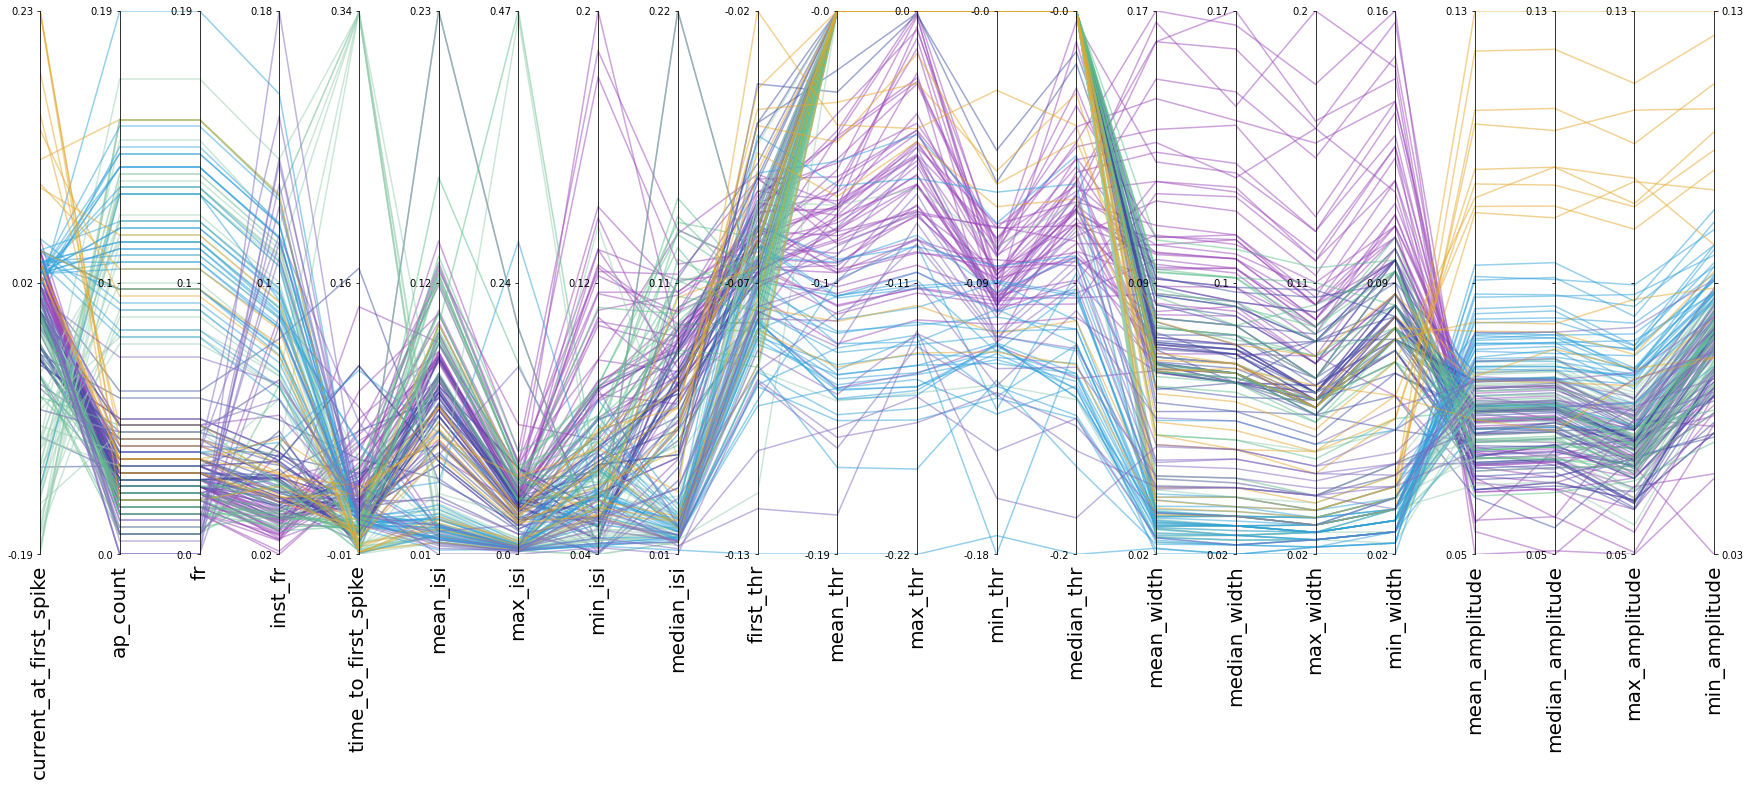

In [295]:
pax_plot_data(SH_combined[cols],cols,SH_combined.labels_ephys,coherence_colors)

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figheight) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
  warnings.warn(
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\paxplot\core.py:842: Warning: The function you have called (set_figwidth) is not officially supported by Paxplot, but it may still work. Report issues to https://github.com/kravitsjacob/paxplot/issues
  warnings.warn(


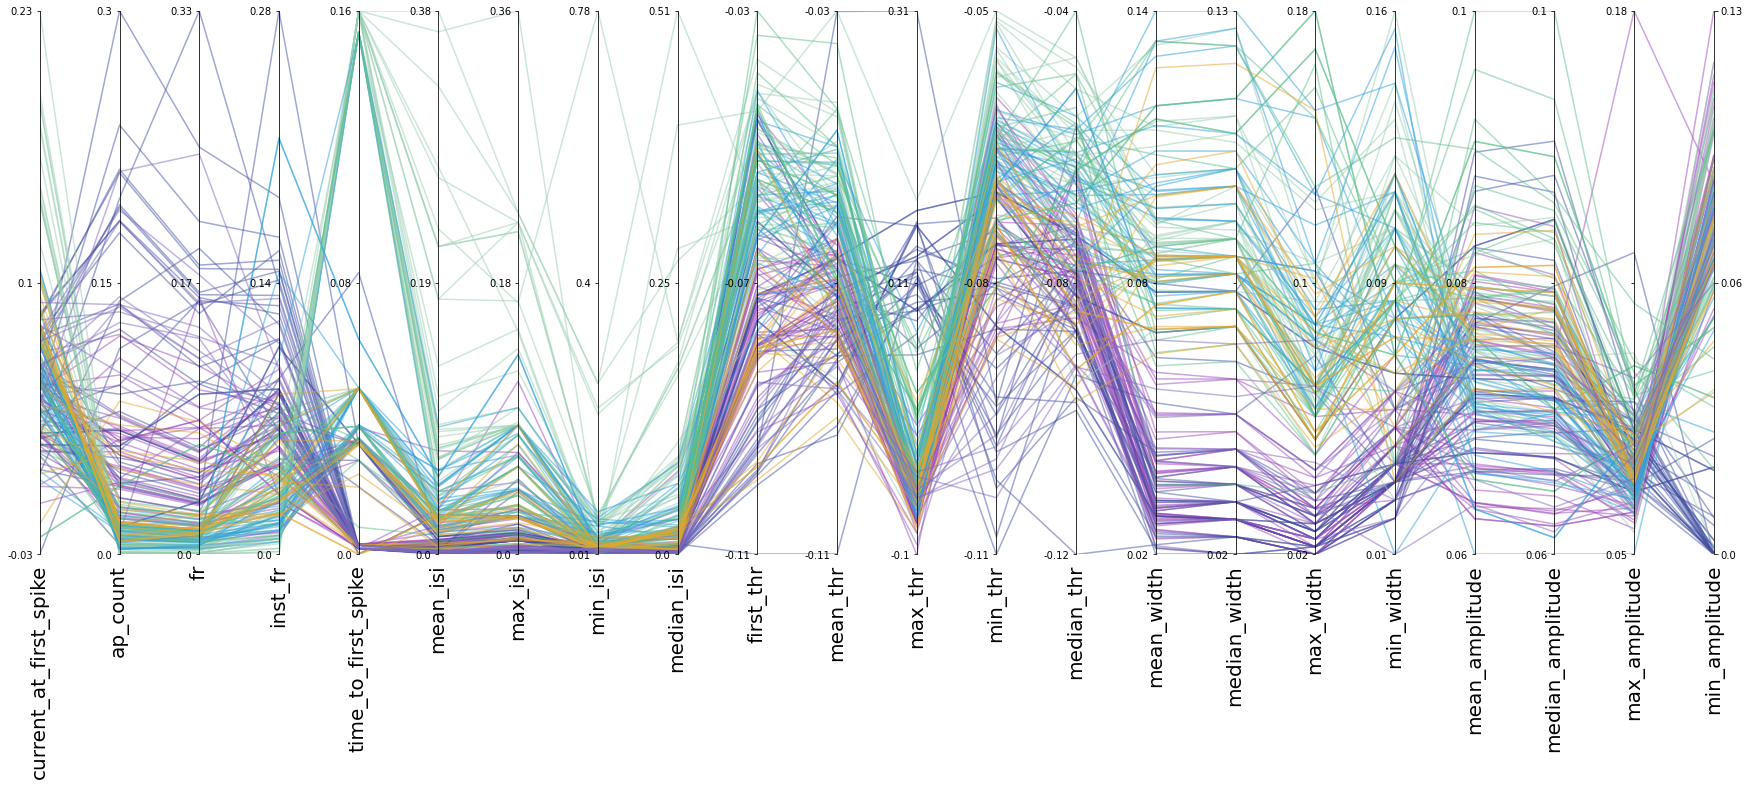

In [269]:
pax_plot_data(FN_combined[cols],cols,FN_combined.labels_ephys,coherence_colors)

In [263]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

print((adjusted_rand_score(FN_combined.labels_ephys,SH_combined.labels_ephys) ,
adjusted_mutual_info_score(FN_combined.labels_ephys,SH_combined.labels_ephys)))



(0.19895716061572422, 0.31766725858660866)


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


5


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


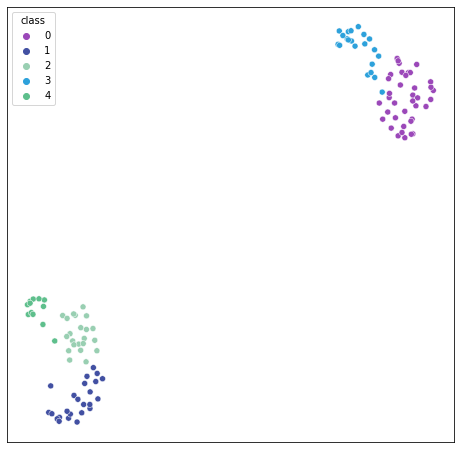

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


5


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


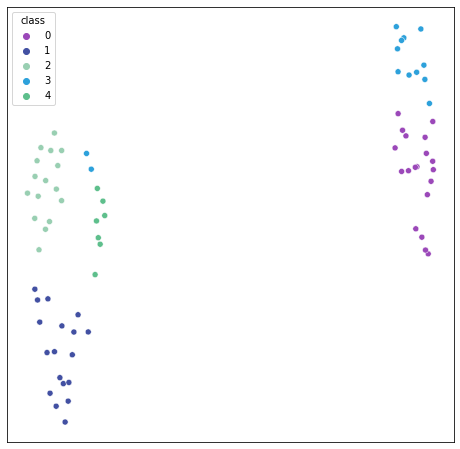

<ipython-input-140-638652592261>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EXC_SH['labels_ephys'] = lables_ephys_exc
<ipython-input-140-638652592261>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INH_SH['labels_ephys'] = lables_ephys_inh


In [140]:
cols = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'max_isi', 'min_isi', 'median_isi',
       'first_thr', 'mean_thr', 'max_thr', 'min_thr', 'median_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude','max_amplitude', 'min_amplitude',]
ephys_data = normalize(np.vstack(EXC_SH[cols].to_numpy()),axis=0)
lables_ephys_exc,mapper,reducer = plot_UMAP_clusters_single(ephys_data,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =coherence_colors,)

ephys_data = normalize(np.vstack(INH_SH[cols].to_numpy()),axis=0)
lables_ephys_inh,mapper,reducer = plot_UMAP_clusters_single(ephys_data,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =coherence_colors,)
EXC_SH['labels_ephys'] = lables_ephys_exc
INH_SH['labels_ephys'] = lables_ephys_inh 

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


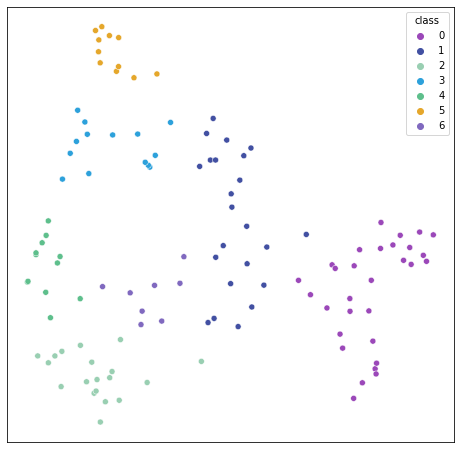

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


5


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


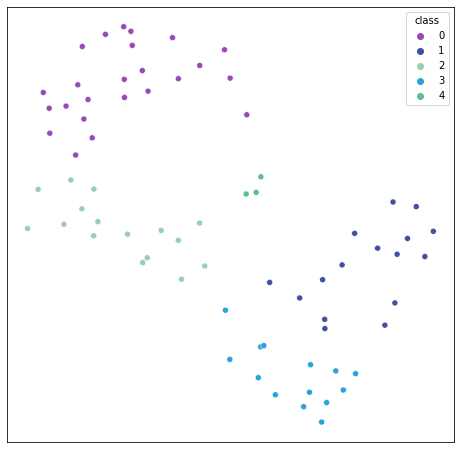

<ipython-input-141-45aef32b7c26>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EXC_FN['labels_ephys'] = lables_ephys_exc
<ipython-input-141-45aef32b7c26>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INH_FN['labels_ephys'] = lables_ephys_inh


In [141]:
cols = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'max_isi', 'min_isi', 'median_isi',
       'first_thr', 'mean_thr', 'max_thr', 'min_thr', 'median_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude','max_amplitude', 'min_amplitude',]
ephys_data = normalize(np.vstack(EXC_FN[cols].to_numpy()),axis=0)
lables_ephys_exc,mapper,reducer = plot_UMAP_clusters_single(ephys_data,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =coherence_colors,)

ephys_data = normalize(np.vstack(INH_FN[cols].to_numpy()),axis=0)
lables_ephys_inh,mapper,reducer = plot_UMAP_clusters_single(ephys_data,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =coherence_colors,)
EXC_FN['labels_ephys'] = lables_ephys_exc
INH_FN['labels_ephys'] = lables_ephys_inh 

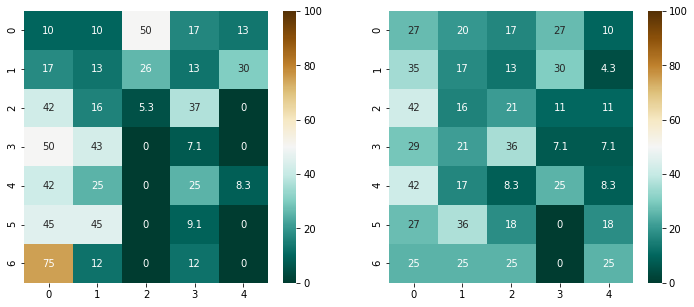

In [142]:
return_confusion_matrix(EXC_FN,EXC_SH,'labels_ephys','labels_ephys',shuffle=True)

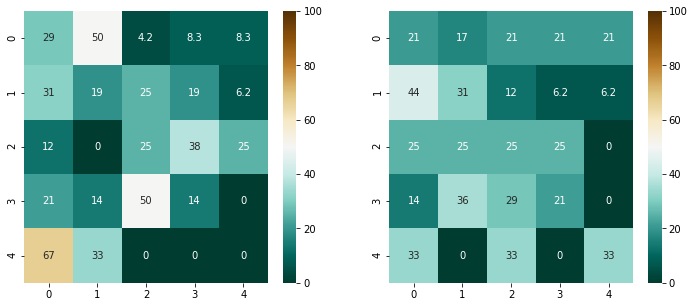

In [143]:
return_confusion_matrix(INH_FN,INH_SH,'labels_ephys','labels_ephys',shuffle=True)

In [145]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

print((adjusted_rand_score(INH_FN.labels_ephys,INH_SH.labels_ephys) ,
adjusted_mutual_info_score(INH_FN.labels_ephys,INH_SH.labels_ephys)))



print((adjusted_rand_score(EXC_FN.labels_ephys,EXC_SH.labels_ephys) ,
adjusted_mutual_info_score(EXC_FN.labels_ephys,EXC_SH.labels_ephys)))

(0.0887117211178802, 0.10123884215064785)
(0.06972605390098982, 0.13003659604620113)


69